#                                            IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import os
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#           MERGING ALL THE DATA-FILES INTO A SINGLE CSV FILE

In [2]:
df = pd.DataFrame()
for file in os.listdir("crypto"):
    if file.endswith(".csv"):
        df = pd.concat([df , pd.read_csv(os.path.join("crypto", file),infer_datetime_format=True)], axis=0 )

df.reset_index(drop=True, inplace=True)
df.drop('SNo',axis=1 ,inplace=True)

In [3]:
df.head()

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,Aave,AAVE,2020-10-05 23:59:59,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,Aave,AAVE,2020-10-06 23:59:59,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,Aave,AAVE,2020-10-07 23:59:59,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,Aave,AAVE,2020-10-08 23:59:59,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,Aave,AAVE,2020-10-09 23:59:59,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08


In [4]:
df.isnull().sum()

Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37082 entries, 0 to 37081
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       37082 non-null  object 
 1   Symbol     37082 non-null  object 
 2   Date       37082 non-null  object 
 3   High       37082 non-null  float64
 4   Low        37082 non-null  float64
 5   Open       37082 non-null  float64
 6   Close      37082 non-null  float64
 7   Volume     37082 non-null  float64
 8   Marketcap  37082 non-null  float64
dtypes: float64(6), object(3)
memory usage: 2.5+ MB


In [6]:
#converting DATE into date-time format
df['Date']=pd.to_datetime(df['Date']).dt.date


# Exploratory Data Analysis (EDA)
-we will  investigate the dataset to discover patterns and useful insight from dataset.

                              Finding the top 5 crytpocurrencies by market cap

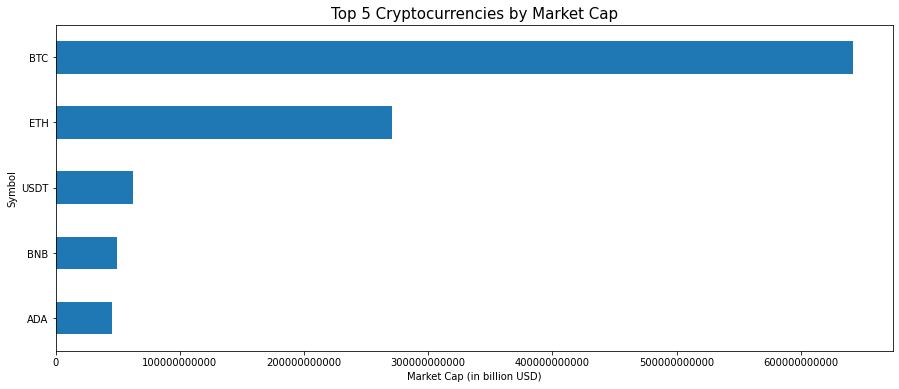

In [7]:
plt.figure(figsize=(15,6))
ax = df.groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).head(5).sort_values().plot(kind='barh')
ax.set_xlabel("Market Cap (in billion USD)")
ax.ticklabel_format( style='plain', axis='x')
plt.title("Top 5 Cryptocurrencies by Market Cap", fontsize=15)
plt.show()

# Observation
-Bitcoin is the highest market capital value.
-Etherum has market capital half of bitcoin market.
-Other are very less in comparison to bitcoin and USDT is 4 times less then the Etherum

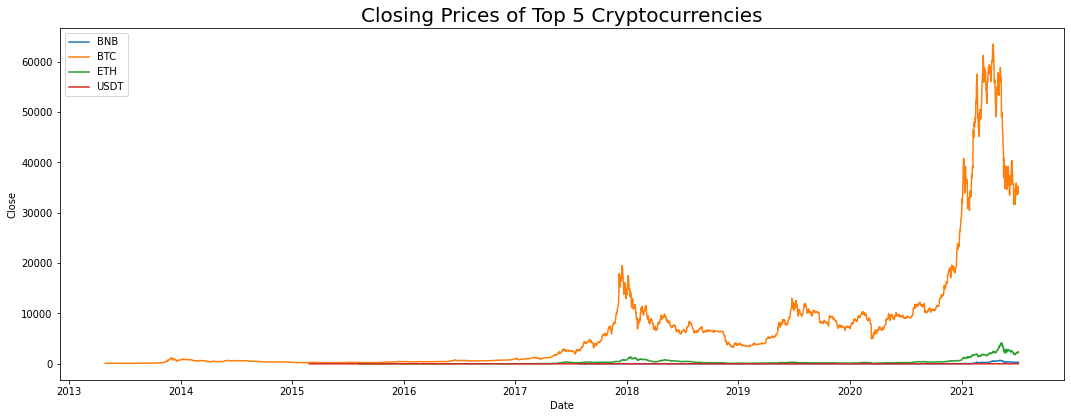

In [8]:
dx=df.copy()

top_5_currency_names = dx.groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).head(4).index
data_top_5_currencies = dx[dx['Symbol'].isin(top_5_currency_names)]
plt.figure(figsize=(18,22))

plt.subplot(3,1,1)
sns.lineplot(data=data_top_5_currencies, x="Date", y="Close", hue='Symbol')
plt.title("Closing Prices of Top 5 Cryptocurrencies", fontsize=20)
plt.legend(loc='upper left')
plt.show()

# Observation:
-In 2021 the value of BTC was at all-time high of nearly 60,000$ which is almost 15 times more than the second-highest cryptocurrency ETH .

-Among the top cryptocurrencies, the growth of BTC, ETH, and USTD over the last five years was beneficial for the investors.

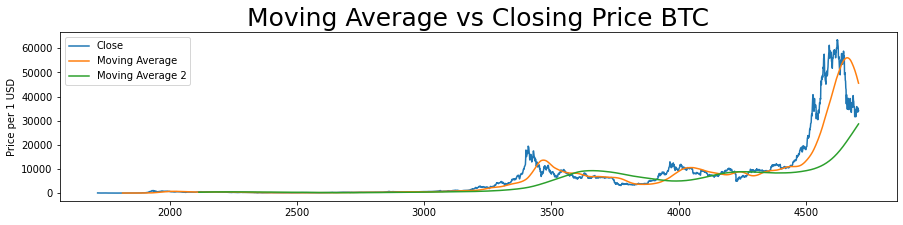

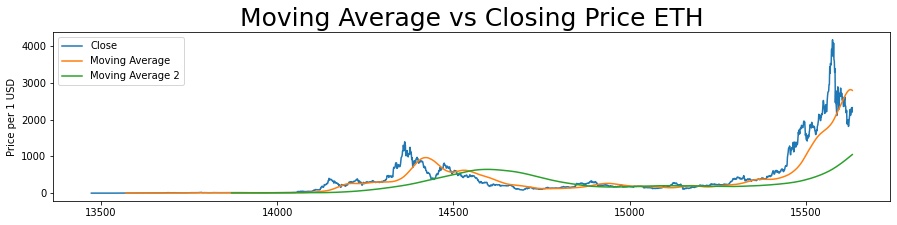

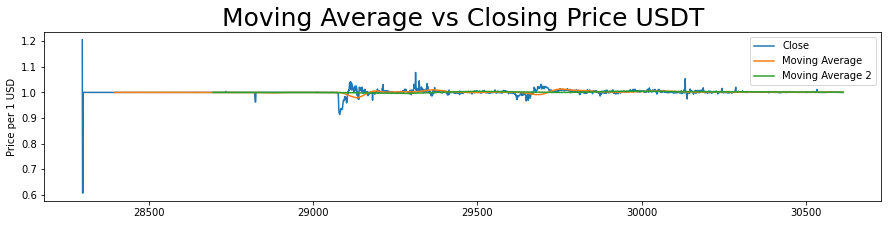

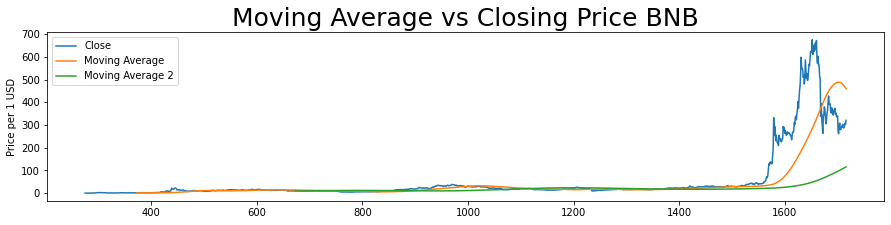

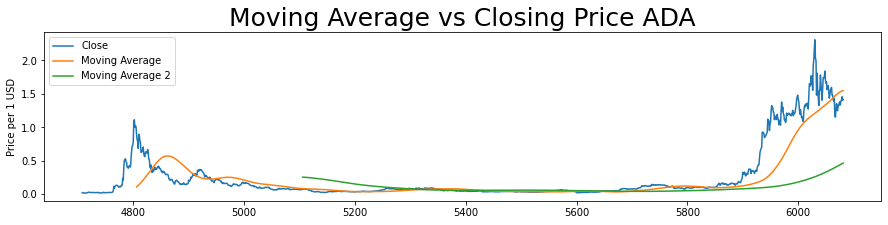

In [9]:
for i in ['BTC','ETH','USDT','BNB','ADA']:
    j=1
    dft=df[df['Symbol']==i]
    top_currency_name = dft.groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).index
    top_currency = dft[dft['Symbol'].isin(top_currency_name)]
    top_currency['Moving Average']=top_currency['Close'].rolling(window=50).mean()
    top_currency['Moving Average 2']=top_currency['Close'].rolling(window=200).mean()
    plt.subplot(5,1,j)
    top_currency['Close'].plot(figsize=(15,18))
    ax=top_currency['Moving Average'].rolling(window=50).mean().plot()
    ax=top_currency['Moving Average 2'].rolling(window=200).mean().plot()
    ax.set_ylabel("Price per 1 USD");
    plt.title(f"Moving Average vs Closing Price {i}", fontsize=25);
    plt.legend()
    j=j+1
    plt.show()

# Observation:
- BTC and ETH
-They have shown a pattern of 2 golden cross and 2 death cross over the years. The last crossing point of moving averages was golden cross hence it was bullish.

- USDT
-There are too many golden cross and death cross. Hence it is a volatile stock and should be avoided for the time being.